In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_55571_R')

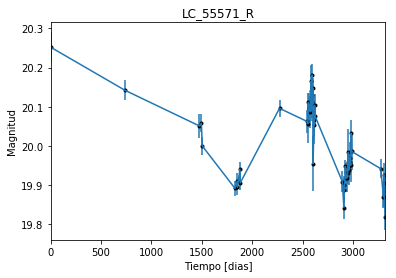

In [2]:
data = np.genfromtxt('LC_55571_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_55571_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

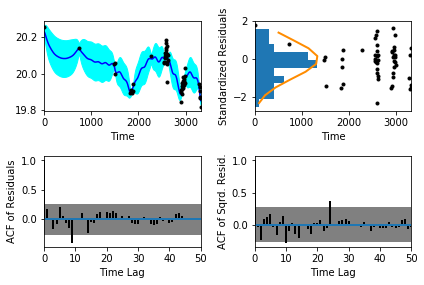

In [5]:
sample.assess_fit()

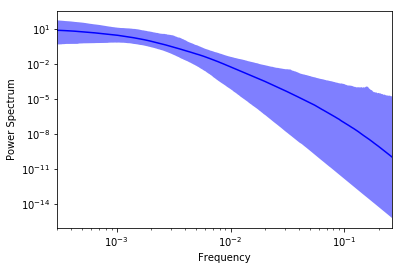

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_55571_R')

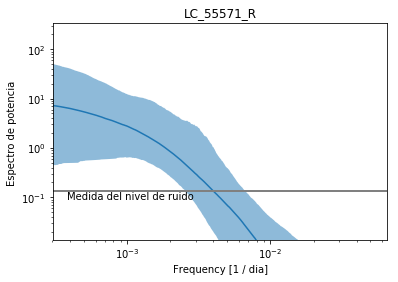

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_55571_R')

Text(0.5,1,'Prediccion , valor esperado LC_55571_R')

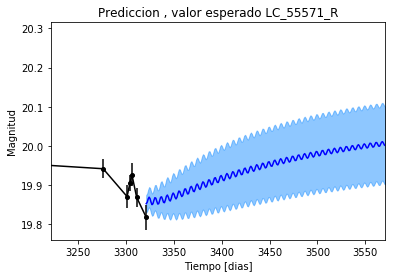

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_55571_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_55571_R')

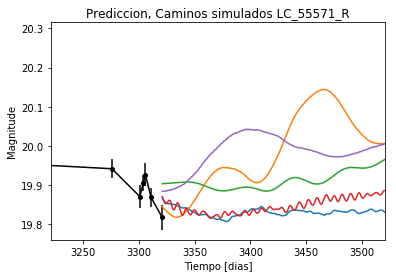

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_55571_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_55571_R')

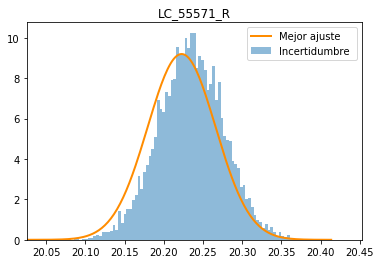

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_55571_R')

Text(0.5,1,'Interpolacion, camino simulado LC_55571_R')

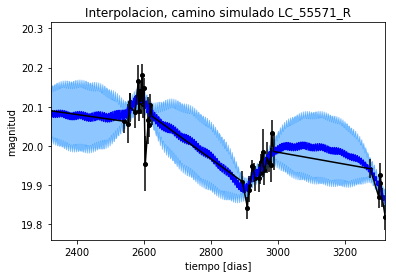

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_55571_R')

Text(0.5,1,'Interpolacion, camino simulado LC_55571_R')

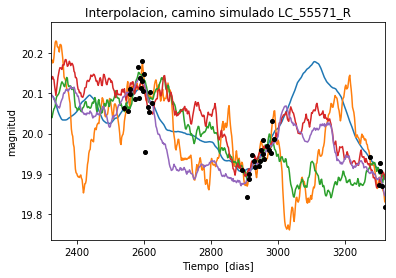

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_55571_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 488.152915519
Median: 0.00938237355484
Standard deviation: 0.102919477852
68% credibility interval: [ 0.00083215  0.12194239]
95% credibility interval: [  3.47697577e-04   4.02504938e-01]
99% credibility interval: [  3.07218004e-04   4.89271339e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 841.759858089
Median: 0.00231074453719
Standard deviation: 0.0456493625143
68% credibility interval: [ 0.00054641  0.02501761]
95% credibility interval: [ 0.00032826  0.16465051]
99% credibility interval: [ 0.00030516  0.29645712]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 231.170884858
Median: 0.0169853544593
Standard deviation

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1248.93638367
Median: 109.218394905
Standard deviation: 1.65111777369
68% credibility interval: [ 107.43614046  110.37245199]
95% credibility interval: [ 104.76442182  111.03686773]
99% credibility interval: [ 102.63248914  112.08046941]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 504.722072052
Median: 0.485846506539
Standard deviation: 1.16066679288
68% credibility interval: [ 0.05035853  2.20420967]
95% credibility interval: [ 0.01437914  4.02746662]
99% credibility interval: [ 0.00986801  5.19840721]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 194.212590709
Median: 0.206263431466
Standard deviation: 2.43061123998
68% credibility interval: [ 0.01411038  2.70461684]
95% credibility interval: [  1.23503374e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310433
Median: 2.23124462831e-19
Standard deviation: 6.11229109748e+24
68% credibility interval: [  1.24758420e-52   7.01577395e-04]
95% credibility interval: [  3.70076431e-94   3.17050482e+04]
99% credibility interval: [  3.94697638e-105   1.37112531e+013]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2973.26850765
Median: 20.0363946405
Standard deviation: 0.0708693147576
68% credibility interval: [ 19.98313193  20.1003244 ]
95% credibility interval: [ 19.90968392  20.18702635]
99% credibility interval: [ 19.81687735  20.27583505]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 403.957250825
Median: 0.00623713539446
Standard deviation: 0.129113045229
68% credibility interval: [ 0.          0.20246311]
95% credibility interval: [ 0.          0.45334611]
99% credibility interval: [ 0.          0.50687369]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 403.957250825
Median: 0.00623713539446
Standard deviation: 0.129113045229
68% credibility interval: [ 0.          0.20246311]
95% credibility interval: [ 0.          0.45334611]
99% credibility interval: [ 0.          0.50687369]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 903.478436239
Median: 0.0
Standard deviation: 0.000744664945139
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1248.93638367
Median: 109.218394905
Standard deviation: 1.65111777369
68% credibility interval: [ 107.43614046  110.37245199]
95% credibility interval: [ 104.76442182  111.03686773]
99% credibility interval: [ 102.63248914  112.08046941]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2420.06709182
Median: 0.0188484923687
Standard deviation: 0.026580693151
68% credibility interval: [ 0.01098011  0.03687397]
95% credibility interval: [ 0.00710562  0.08914587]
99% credibility interval: [ 0.00552499  0.17472589]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1110.38986098
Median: 1.03658872646
Standard deviation: 0.169970476119
68% credibility interval: [ 0.886119   1.2119291]
95% credibility interval: [ 0.76018736  1.43202436]
99% credibility interval: [ 0.68747403  1.59606091]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 373.145805684
Median: 6.09260590968e-05
Standard deviation: 0.0157367284319
68% credibility interval: [  2.27163012e-06   1.48463626e-03]
95% credibility interval: [  3.03116061e-09   2.80674429e-02]
99% credibility interval: [  6.85073901e-18   1.30691853e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 488.152915519
Median: (-0.0589511916662+0j)
Standard deviation: 1.03744118095
68% credibility interval: [-0.76618665-1.34701268j -0.00522852-3.14538333j]
95% credibility interval: [ -2.52901311e+00-0.49068655j  -2.18464831e-03-0.01689393j]
99% credibility interval: [ -3.07418249e+00+0.j          -1.93030765e-03-0.01106919j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 841.759858089
Median: (-0.0145188361247+0.0348407608517j)
Standard deviation: 0.860453328953
68% credibility interval: [-0.15719030+0.00941255j -0.00343318+0.56421089j]
95% credibility interval: [-1.03452964+1.53864259j -0.00206251+0.j        ]
99% credibility interval: [-1.86269503+2.363974j  -0.00191736+0.0249308j]
Posterior summary for parameter ar_